<a href="https://colab.research.google.com/github/gokuljagannadh/Airbnb_Booking_Analysis/blob/main/TASK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import matplotlib
from matplotlib import pyplot as plt
# import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.manifold import TSNE

from sklearn.decomposition import TruncatedSVD 
from sklearn.preprocessing import normalize 



##Loading Data
In this session we list out the email txt files from the pool of cat and text email files downloaded from enron website. Also we make a list of emails in this session to clean the data 



In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#loading txt files from a folder 
#import required module
import os
# assign directory
directory = '/content/drive/MyDrive/Colab Notebooks/emails/'

# iterate over files in
# that directory
list_dir=[]
for filename in os.listdir(directory):
  if filename.endswith('.txt'):
   f = os.path.join(directory, filename)
   list_dir.append(f)


	# checking if it is a file
#if os.path.isfile(f):
#  	 X=list_dir.append(print(f))

#Making a list of emails by reading txt files
email_list=[]
for file in list_dir:
  row=[]
  s=" "
  email = open(file, 'r')
  s=s.join(email)
  email_list.append(s) 
     #for i in line.split(","):
      #   row[-1].append(i)
#email_list[1]

  

In [7]:
len(email_list)

1265

##Cleaning the data
In this session we  extract the message content from the raw email and check if duplicates are present

In [8]:
# Now we extract the message body from the given email
def parse_raw_message(raw_message):
    lines = raw_message.split('\n')
    email = {}
    message = ''
    keys_to_extract = ['from', 'to']
    for line in lines:
        if ":"  not in line:
            message += line.strip()
            email['body']= message
        else:
            pairs = line.split(':')
            key = pairs[0].lower()
            val = pairs[1].strip()
            if key in keys_to_extract:
                email[key] = val
    return email


In [9]:
#Making a dataframe of the emails and renaming the column as message
emails=pd.DataFrame(email_list)
emails_df=emails.rename(columns={0:"message"})

Here we can see that the unique values  of message content is 1265 which is same as the total number of email Files in the list.

In [10]:
emails_df['message'].unique().shape

(1265,)

Now we extract the message content by simply applying the parse function that i defined. Since parse to message give output as dictionary we have to extract the body using content function as mentioned below. we also remove punctuations from the message.

In [11]:
#Here let's extract the body of each email
emails_df['body']=emails_df['message'].apply(parse_raw_message)

#Also defining a function to extract the values of the key value pair in the message body dictionary
def content(txt,body):
  return txt['body']

#applying the above function to extract the message body
emails_df['message_content']  = emails_df.apply(lambda x: content(x['body'],'body'),axis=1)

In [12]:


# Now let us define a function to remove the punctuations in the message body
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

    #removing punctuations from each email
emails_df['message_content']=emails_df['message_content'].apply(remove_punctuation)

Now We remove the stop words from the given message content.

In [13]:
#Removing stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

sw = list(stopwords.words('english'))
#print(sw)

def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

# Removing the stopwords from the message 
emails_df['stop_word_message']=emails_df['message_content'].apply(stopwords)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Now let us visualise the top words in the message.



In [14]:
# create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(emails_df['stop_word_message'])
# collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [15]:
print(dictionary)

dict_items([('zausner', 74211), ('kind', 37571), ('mixed', 42683), ('bag', 10071), ('think', 66176), ('hes', 31791), ('strong', 61820), ('intellectually', 34638), ('hassome', 31078), ('influence', 34135), ('dont', 22330), ('trust', 68713), ('keep', 37326), ('strategy', 61713), ('contactsconfidentialcynthia', 17772), ('sandherrhartsoecorpenronenron', 57135), ('sarah', 57201), ('novoselcorpenronenron', 45132), ('tombriggsnaenronenron', 67703), ('chris', 15413), ('longcorpenronenrontoday', 39541), ('spoke', 60495), ('epsas', 25047), ('outside', 47662), ('counsel', 18655), ('andy', 7583), ('hisfirms', 32155), ('senior', 58169), ('former', 27805), ('senator', 58142), ('wendell', 71742), ('ford', 27622), ('dky', 22062), ('197498', 1287), ('assist', 9160), ('uswith', 69975), ('ferc', 26604), ('linda', 39063), ('breathitt', 12564), ('knew', 37652), ('lindasfather', 39091), ('well', 71664), ('plus', 50002), ('dinner', 21560), ('every', 25466), ('several', 58475), ('weeks', 71561), ('thereprobab

In [16]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

In [17]:
#we can visualise the top words 
#top_vacab = vocab_bef_stem.head(10)
#top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (25230, 25260))

Now do the stemming to avoid multiple modification of the same words

In [18]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

emails_df['stop_word_message'] = emails_df['stop_word_message'].apply(stemming)
#emails_df.head(10)

Inorder to understand how each words repeatedly are present in the email, we make a document term matrix and visualise it using plot

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


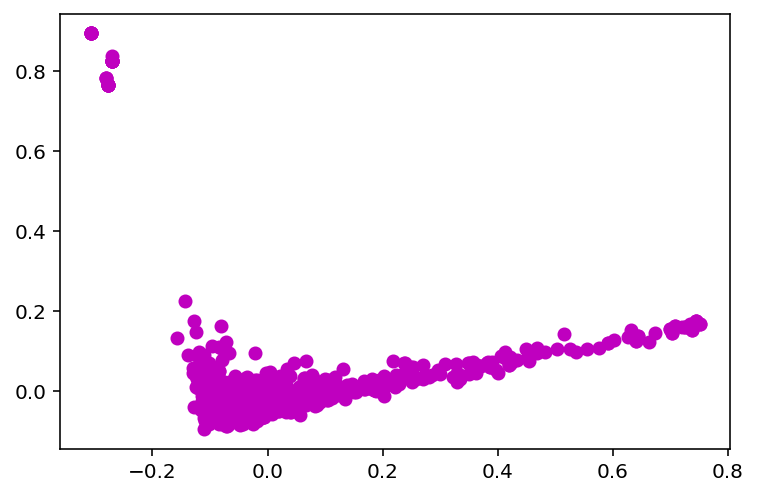

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
vect = TfidfVectorizer(stop_words='english', max_df=0.50, min_df=2)
X = vect.fit_transform(emails_df.stop_word_message)

X_dense = X.todense()
coords = PCA(n_components=2).fit_transform(X_dense)
plt.scatter(coords[:, 0], coords[:, 1], c='m')
plt.show()

#this gives us the names correspondig to each vector
features = vect.get_feature_names()


Now we pick top words present in each document



In [ ]:
def top_tfidf_feats(row, features, top_n=20):
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats, columns=['features', 'score'])
    return df
def top_feats_in_doc(X, features, row_id, top_n=25):
    row = np.squeeze(X[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)


print(top_feats_in_doc(X, features, 2, 10))

    features     score
0     broker  0.220073
1  antiarena  0.173747
2       said  0.165615
3      trade  0.161592
4   campaign  0.155810
5     market  0.154246
6     effort  0.140734
7       year  0.135643
8   activist  0.130968
9       hotz  0.130310


Also we pick the top words in all the documents

In [ ]:
def top_mean_feats(X, features,
 grp_ids=None, min_tfidf=0.1, top_n=25):
    if grp_ids:
        D = X[grp_ids].toarray()
    else:
        D = X.toarray()
        D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

print(top_mean_feats(X,features,grp_ids=None,min_tfidf=0.1,top_n=25))


        features     score
0          power  0.018234
1     california  0.016494
2          price  0.016371
3           said  0.014554
4         market  0.013421
5         energi  0.013001
6         electr  0.012240
7          state  0.012192
8          enron  0.011949
9           meet  0.011593
10         email  0.011088
11          ferc  0.010431
12        steven  0.010414
13   keannaenron  0.010170
14       forward  0.009931
15          link  0.009604
16        report  0.009506
17        messag  0.009334
18       compani  0.008892
19  concurexpens  0.008821
20        approv  0.008803
21           ken  0.008465
22         click  0.008243
23         pleas  0.008193
24        follow  0.008097


Now, It is the time to categorise each mails

In [ ]:
n_clusters = 5
clf = KMeans(n_clusters=n_clusters, 
            max_iter=100, 
            init='k-means++', 
            n_init=1)
labels = clf.fit_predict(X)

In [ ]:
X_dense = X.todense()
pca = PCA(n_components=2).fit(X_dense)
coords = pca.transform(X_dense)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


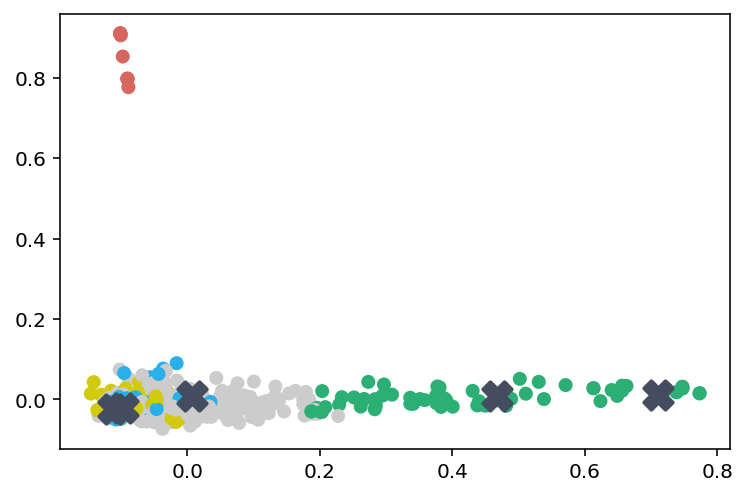

In [ ]:

# Lets plot it again, but this time we add some color to it.
# This array needs to be at least the length of the n_clusters.
label_colors = ["#2AB0E9", "#2BAF74", "#D7665E", "#CCCCCC", 
                "#D2CA0D", "#522A64", "#A3DB05", "#FC6514"]
colors = [label_colors[i] for i in labels]

plt.scatter(coords[:, 0], coords[:, 1], c=colors)
# Plot the cluster centers
centroids = clf.cluster_centers_
centroid_coords = pca.transform(centroids)
plt.scatter(centroid_coords[:, 0], centroid_coords[:, 1], marker='X', s=200, linewidths=2, c='#444d60')
plt.show()



In [ ]:
centroid_coords[:]

array([[-0.09709584, -0.02041028],
       [ 0.46730653,  0.00982711],
       [ 0.71074291,  0.01057714],
       [-0.11226636, -0.02281139],
       [ 0.00724974,  0.00771271]])

In [ ]:
centroid_coords[:,1]

array([-0.02041028,  0.00982711,  0.01057714, -0.02281139,  0.00771271])

In [ ]:
def top_feats_per_cluster(X, y, features, min_tfidf=0.1, top_n=25):
    dfs = []
    labels = np.unique(y)
    for label in labels:
        ids = np.where(y==label) 
        feats_df = top_mean_feats(X, features, ids,    min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)
    return dfs

In [ ]:
#Use this to print the top terms per cluster with matplotlib.
print(top_feats_per_cluster(X, labels, features, 0.1, 10))

[  features     score
0     meet  0.023673
1    plane  0.013562
2     john  0.013358
3     room  0.013259
4     rick  0.012196
5   attend  0.012159
6  compani  0.012128
7     mark  0.012098
8  maureen  0.011010
9      fli  0.010770,      features     score
0       power  0.183848
1       price  0.178500
2       state  0.148430
3        said  0.145392
4  california  0.141981
5      electr  0.118155
6      market  0.111988
7      energi  0.107485
8     generat  0.073540
9        util  0.068860,      features     score
0      polici  0.332314
1    procedur  0.329154
2     certifi  0.243464
3   complianc  0.225435
4      extens  0.216589
5          ew  0.177472
6     haedick  0.149866
7  legalonlin  0.148600
8      servic  0.115362
9       revis  0.114798,   features     score
0    email  0.035555
1    enron  0.033653
2     need  0.026759
3     ferc  0.026168
4     work  0.025451
5   market  0.025322
6    pleas  0.023716
7     know  0.023585
8     issu  0.023227
9   inform  0.023122,   fea

   features     score
0      imag  0.025064
1      said  0.023271
2    electr  0.022829
3  procedur  0.019457
4       bid  0.017924
5      ferc  0.016240
6    polici  0.016167
7       iso  0.015312
8     nodal  0.013257
9    messag  0.012246


In [ ]:
 batch_size = 500
 clf = MiniBatchKMeans(n_clusters=n_clusters, init_size=1000, batch_size=batch_size, max_iter=100)  
 clf.fit(X)

MiniBatchKMeans(batch_size=500, init_size=1000, n_clusters=5)

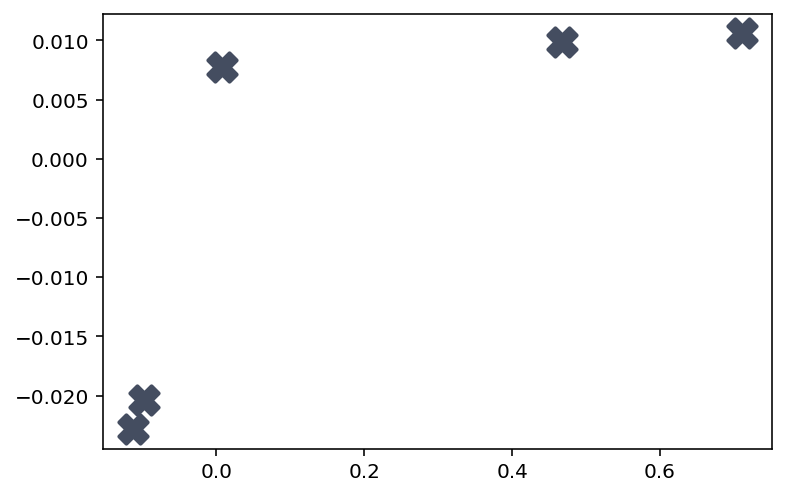

In [ ]:
centroids = clf.cluster_centers_
centroid_coords = pca.transform(centroids)
plt.scatter(centroid_coords[:, 0], centroid_coords[:, 1], marker='X', s=200, linewidths=2, c='#444d60')
plt.show()


Finding Related Emails

In [ ]:
#print(X[0:1])

In [ ]:
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(X[0:1],X).flatten()
# print out the cosine similarities
#print(cosine_sim)


In [ ]:
query = "meet"
vec_query = vect.transform([query])


In [ ]:
cosine_sim = linear_kernel(vec_query, X).flatten()


In [ ]:
related_email_indices = cosine_sim.argsort()[:-10:-1]


In [ ]:
print(related_email_indices)

[698 696 647 734  30  12 656 103 714]


In [ ]:
first_email_index = related_email_indices[0]
print(emails_df.message_content.as_matrix()[first_email_index])


AttributeError: ignored